# NB2. Centrality Measures

# Lunita's Team:

* Cano Jeorval
* Cuevas Danilo
* Erosa Jorge
* Hernandez Andrés
* Robles Jack

In [1]:
#Import libraries
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## A. Krackhardt Kite Graph [30 pts]

In this section you will work with **Degree, Closeness and Betweeness Centrality** using Network X. The documentation about Centrality can be found [here](https://networkx.github.io/documentation/stable/reference/algorithms/centrality.html).
### Degree Centrality
I.  Create a NetworkX Graph of Krackhardt Kite Graph (1990):


<img src="fig1.png" width="180"> </img>

In [2]:
Kite_Graph = nx.krackhardt_kite_graph()

II. Which are the most important nodes in the Kite Graph based on the Degree Centrality?

In [3]:
degC = nx.degree_centrality(Kite_Graph)
values_degC = degC.copy()
degC = sorted(degC.keys(), key = lambda x:degC[x], reverse = True)
degC

[3, 5, 6, 0, 1, 2, 4, 7, 8, 9]

In [4]:
values_degC[3]

0.6666666666666666

In [5]:
values_degC[5]

0.5555555555555556

#### Answer:
The most important node according to degree centrality is 3 follow by 5 and 6

In Directed Networks, the in-degree and out-degree can be obtained as follows:
```Python
indegC = nx.in_degree_centrality(Graph)
outdegC = nx.out_degree_centrality(Graph)
```

### Closeness Centrality
III. Recreate a NetworkX Graph and compute the Closeness Centraliy of node 1:
<img src="fig3.png" width="180"> </img>

In [6]:
G = nx.DiGraph()

In [7]:
edges = [
    # just there is a way from 1 to other node
    (1, 2),
    # there is'nt ways/paths from 2
    (3, 4),
    (3, 1),
    (4, 1),
    (4, 5),
    (5, 1),
    (5, 2)
]

G.add_edges_from(edges)

In [8]:
# F.nodes wf_improved is to normalized each closeness by the number of nodes that can actually reach
Ccg = nx.algorithms.centrality.closeness_centrality(G, u = None, wf_improved = False)
Ccg

{1: 1.0, 2: 0.6666666666666666, 3: 0.0, 4: 1.0, 5: 0.6666666666666666}

A mistake would be to think the closeness centraly of node 1 is 1, but is not normalized and for normalized we need to multyply by
$$
\frac{reacheable \space\ nodes}{n - 1}
$$

In [9]:
Ccg[1] * (1)/(5-1)

0.25

#### Answer:
The closeness centrality of node 1 is $\frac{1}{4}$

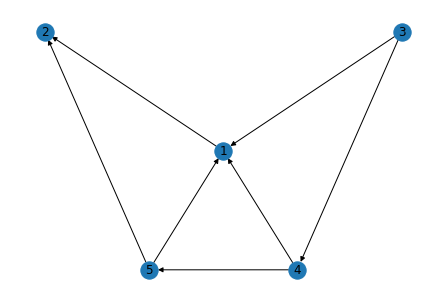

In [10]:
nx.draw_spectral(G, with_labels = True)

IV. Which are the most important nodes in the Kite Graph based on the Closeness Centrality?

In [11]:
Cc = nx.algorithms.centrality.closeness_centrality(Kite_Graph)
values_Cc = Cc.copy()
Cc = sorted(Cc.keys(), key = lambda x:Cc[x], reverse = True)
Cc

[5, 6, 3, 7, 0, 1, 2, 4, 8, 9]

In [12]:
values_Cc

{0: 0.5294117647058824,
 1: 0.5294117647058824,
 2: 0.5,
 3: 0.6,
 4: 0.5,
 5: 0.6428571428571429,
 6: 0.6428571428571429,
 7: 0.6,
 8: 0.42857142857142855,
 9: 0.3103448275862069}

#### Answer: 
The most important node according to closeness centrality are the node 5 and 6 which have the same closeness centrality

### Betweeness Centrality
V. Recreate a NetworkX Graph for the following graph and find the node with the highest Betweenness Centrality:
<img src="fig2.png" width="180"> </img>

In [13]:
G = nx.Graph()

In [14]:
edges = np.array([
    (1, 2),
#     (2, 1),
    (2, 3),
#     (3, 2),
    (2, 4),
#     (4, 2),
    (4, 5),
#     (5, 4),
    (3, 5),
#     (5, 3)
])
G.add_edges_from(edges)

In [15]:
BetweennessCentrality = nx.algorithms.centrality.betweenness_centrality(G, normalized = True)
BetweennessCentrality

{1: 0.0,
 2: 0.5833333333333333,
 3: 0.16666666666666666,
 4: 0.16666666666666666,
 5: 0.08333333333333333}

In [16]:
BetweennessCentralityNon = nx.algorithms.centrality.betweenness_centrality(G, normalized = False)
BetweennessCentralityNon

{1: 0.0, 2: 3.5, 3: 1.0, 4: 1.0, 5: 0.5}

#### Answer
The $node_{2}$ have the highest Betweenness Centrality with:

normalized data is $C_{bnorm}(n_2) \approx 0.5833 $

non-normalized data is $C_b(n_2) = 3.5$



In [17]:
importat_node = max(BetweennessCentrality.items(), key = lambda x: x[1])

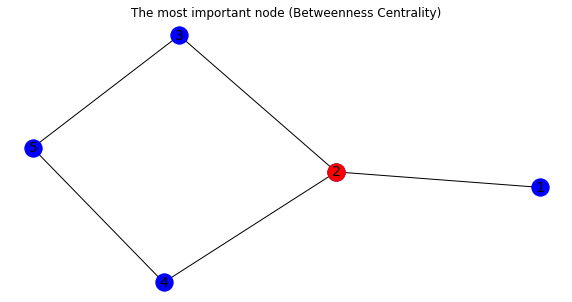

In [18]:
fig, ax = plt.subplots( nrows=1, ncols= 1, figsize = (10, 5))

ax.set_title("The most important node (Betweenness Centrality)")

ax.set_axis_off()


pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color = 'blue', ax = ax)
nx.draw_networkx_nodes(G, pos, nodelist=[importat_node[0]] , node_color = 'red', ax = ax)
nx.draw_networkx_edges(G, pos, edgelist = G.edges, ax = ax)

labels = {}
for node in G.nodes:
    labels[node] = "$%s$" % node

nx.draw_networkx_labels(G, pos, labels = labels, font_size = 14, ax = ax)

ax.set_facecolor("white")


Compute $C_{btw}$ of all nodes can be very computationally expensive. Instead computing $C_{btw}$ with all pairs of nodes. It can bet approximated using a sample of nodes (k). 
```Python
btwC_G = nx.betweenness_centrality(G, k = 25)
```

VI. Which are the most important nodes in the Kite Graph based on the Betweenness Centrality?

In [19]:
btwC_G = nx.betweenness_centrality(Kite_Graph, normalized = True)

In [20]:
btwC_G

{0: 0.023148148148148143,
 1: 0.023148148148148143,
 2: 0.0,
 3: 0.10185185185185183,
 4: 0.0,
 5: 0.23148148148148148,
 6: 0.23148148148148148,
 7: 0.38888888888888884,
 8: 0.2222222222222222,
 9: 0.0}

In [21]:
NbtwC_G = nx.betweenness_centrality(Kite_Graph, normalized = False)

In [22]:
NbtwC_G

{0: 0.8333333333333333,
 1: 0.8333333333333333,
 2: 0.0,
 3: 3.666666666666666,
 4: 0.0,
 5: 8.333333333333334,
 6: 8.333333333333334,
 7: 14.0,
 8: 8.0,
 9: 0.0}

In [23]:
Bc_max = sorted(btwC_G, key = lambda x:btwC_G[x], reverse = True)
Bc_max[0]

7

#### Answer
The most important node is $node_7$

In [24]:
importat_node = max(NbtwC_G.items(), key = lambda x: x[1])

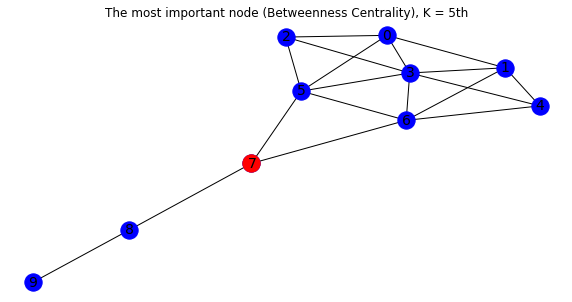

In [25]:
fig, ax = plt.subplots( nrows=1, ncols= 1, figsize = (10, 5))

ax.set_title("The most important node (Betweenness Centrality), K = 5th")

ax.set_axis_off()


pos = nx.spring_layout(Kite_Graph)
nx.draw_networkx_nodes(Kite_Graph, pos, node_color = 'blue', ax = ax)
nx.draw_networkx_nodes(Kite_Graph, pos, nodelist=[importat_node[0]] , node_color = 'red', ax = ax)
nx.draw_networkx_edges(Kite_Graph, pos, edgelist = Kite_Graph.edges, ax = ax)

labels = {}
for node in Kite_Graph.nodes:
    labels[node] = "$%s$" % node

nx.draw_networkx_labels(Kite_Graph, pos, labels = labels, font_size = 14, ax = ax)

ax.set_facecolor("white")

VII. Elaborate a Comparative Table of the most important nodes (1st, 2nd and 3rd) in the Kite Graph. In case of tie, include all nodes with the same centrality value.

In [26]:
btwC_G

{0: 0.023148148148148143,
 1: 0.023148148148148143,
 2: 0.0,
 3: 0.10185185185185183,
 4: 0.0,
 5: 0.23148148148148148,
 6: 0.23148148148148148,
 7: 0.38888888888888884,
 8: 0.2222222222222222,
 9: 0.0}

In [27]:
Bc_max[:3]

[7, 5, 6]

In [28]:
most_important_nodes = {key: {'betweness centrality': value} for key, value in zip(btwC_G, btwC_G.values()) if key in Bc_max[:3]}

In [29]:
df = pd.DataFrame(most_important_nodes).T
df.reset_index(drop = False, inplace = True)

In [30]:
df.columns = ['Node', 'Betweness centrality']
df.sort_values(by = 'Betweness centrality', ascending = False)

,Node,Betweness centrality
2,7,0.388889
0,5,0.231481
1,6,0.231481


## B. Eigenvector and Katz Centrality [30 pts]
In this section, you will obtain the **Eigenvector and Katz Centrality** for small networks. Additionally, you will compare this results with the theoretical description. 

The section is based on the chapter Zafarani, Reza et. al. (2014). *Network Measures from Social Media Mining.* Cambridge University Press.

### Eigenvector Centrality
VIII. Consider the following network:
<img src="fig4.png" width="180"> </img>
Represent it using NetworkX and its adjacency matrix using Numpy (Be careful about the order in the matrix).

In [31]:
G = nx.Graph()

In [32]:
edges = np.array([
    (1, 2),
    (1, 4),
    (2, 3),
    (2, 4),
    (2, 5),
    (3, 4),
])
G.add_edges_from(edges)

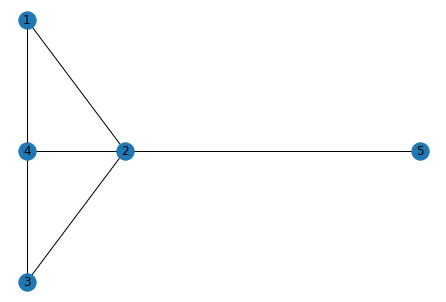

In [33]:
nx.draw_spectral(G, with_labels = True)

In [34]:
n = len(G.nodes)

In [35]:
matrix = np.zeros((n, n))

In [36]:
for com in edges:
    idx, idy = com - 1
#     print(idx, idy)
    matrix[idx , idy ] = 1
    matrix[idy, idx ] = 1

In [37]:
matrix

array([[0., 1., 0., 1., 0.],
       [1., 0., 1., 1., 1.],
       [0., 1., 0., 1., 0.],
       [1., 1., 1., 0., 0.],
       [0., 1., 0., 0., 0.]])

IX. Obtain the Eigenvector Centrality using NetworkX.

In [38]:
eig_centrality = nx.eigenvector_centrality(G)
eig_centrality_numpy = nx.eigenvector_centrality_numpy(G)

print("Networkx\n", eig_centrality,
      "\n",
      "Numpy\n",
      eig_centrality_numpy)

Networkx
 {1: 0.41191709737006765, 2: 0.5825392535755105, 4: 0.5236826290621273, 3: 0.41191709737006765, 5: 0.21691733875073665} 
 Numpy
 {1: 0.41191727694049707, 2: 0.5825389996250452, 4: 0.5236829442247815, 3: 0.41191727694049696, 5: 0.21691657788137758}


X. Obtain the Eigenvector Centrality using the Matrix Definition.

In [39]:
def EigenvectorCentrality(A):
    CG = np.ones((A.shape[0], 1))
    for _ in range(100):
        aux = A @ CG
        normalizeValue = np.linalg.norm(aux)
        CG = aux / normalizeValue
        
    return CG

$A =$ is a matrix

$\lambda =$ is an eigenvalue of matrix A

$x =$ is an eigenvector of matrix A

$Ax=\lambda x$

In [40]:
A = nx.adjacency_matrix(G)
A = A.toarray()

In [41]:
EigCenNx = np.array(list(eig_centrality.values())).reshape((-1, 1))
EigCenM = EigenvectorCentrality(A)

In [42]:
EigCenM

array([[0.41191728],
       [0.582539  ],
       [0.52368294],
       [0.41191728],
       [0.21691658]])

In [43]:
eigen_values = {key: value[0] for key, value in enumerate(EigCenM.tolist())}
eigen_values

{0: 0.41191727694049707,
 1: 0.5825389996250452,
 2: 0.5236829442247816,
 3: 0.41191727694049707,
 4: 0.21691657788137755}

### Katz Centrality

XI. Obtain the Katz Centrality using NetworkX considering:
* $\alpha = 0.25$
* $\beta = 0.2$

In [44]:
nx.algorithms.centrality.katz_centrality(G, alpha = 0.25, beta = 0.2)

{1: 0.41791649380799795,
 2: 0.5600080132056173,
 4: 0.5014997075105204,
 3: 0.41791649380799795,
 5: 0.29254175243684233}

In [45]:
nx.algorithms.centrality.katz_centrality(G, alpha = 0.25, beta = 0.2, normalized = False)

{1: 0.5479436419963695,
 2: 0.7342443642437653,
 4: 0.6575322588719749,
 3: 0.5479436419963695,
 5: 0.38356082050183005}

XII. Obtain the Katz Centrality using the Matrix Definition considering:
* $\alpha = 0.25$
* $\beta = 0.2$

In [46]:
matrix = nx.linalg.graphmatrix.adjacency_matrix(G)

In [47]:
identity_matrix = np.identity(5)

In [48]:
alpha = 0.25
beta = 0.2

result = beta * np.linalg.inv(identity_matrix - alpha * matrix.T)

We only found how to get the katz centrality without normalizing 

In [49]:
(np.sum(result, axis = 1))

matrix([[0.54794521],
        [0.73424658],
        [0.65753425],
        [0.54794521],
        [0.38356164]])

In [50]:
katz_values = {key: value[0] for key, value in enumerate(np.sum(result, axis = 1).tolist())}
katz_values

{0: 0.547945205479452,
 1: 0.7342465753424657,
 2: 0.6575342465753425,
 3: 0.5479452054794521,
 4: 0.3835616438356164}

### C. Use Case:  E-mail Network [40 pts]

Consider the following E-Mail Network (Ryan A. Rossi andNesreen K. Ahmed, 2015) in a University (http://networkrepository.com/email-univ.php).

Complete the following instructions:

I. [5 pts] Compute the following Network Parameters: Number of Nodes, Number of Edges, Maximum and Minimum Degree, Average Clustering Coefficient and Transitivity.

In [51]:
EmailNet = nx.read_edgelist('data/email-univ.edges')

Graph status

In [52]:
nodes = len(EmailNet.nodes)
edges = len(EmailNet.edges)
degree_sequence = sorted([d for n, d in EmailNet.degree() ], reverse=True)
dmax = max(degree_sequence)
dmin = min(degree_sequence)
ACC = nx.average_clustering(EmailNet)
Transitivity = nx.transitivity(EmailNet)

In [53]:
print("Number of Nodes => %s" % nodes)
print("Number of Edges => %s" % edges)
print("Maximum degree => %s" % dmax)
print("Minimum degree => %s" % dmin)
print("Average Clustering Coefficient => %s" % ACC)
print("Transitivity => %s" % Transitivity)

Number of Nodes => 1133
Number of Edges => 5451
Maximum degree => 71
Minimum degree => 1
Average Clustering Coefficient => 0.2201760865041161
Transitivity => 0.16625006482393817


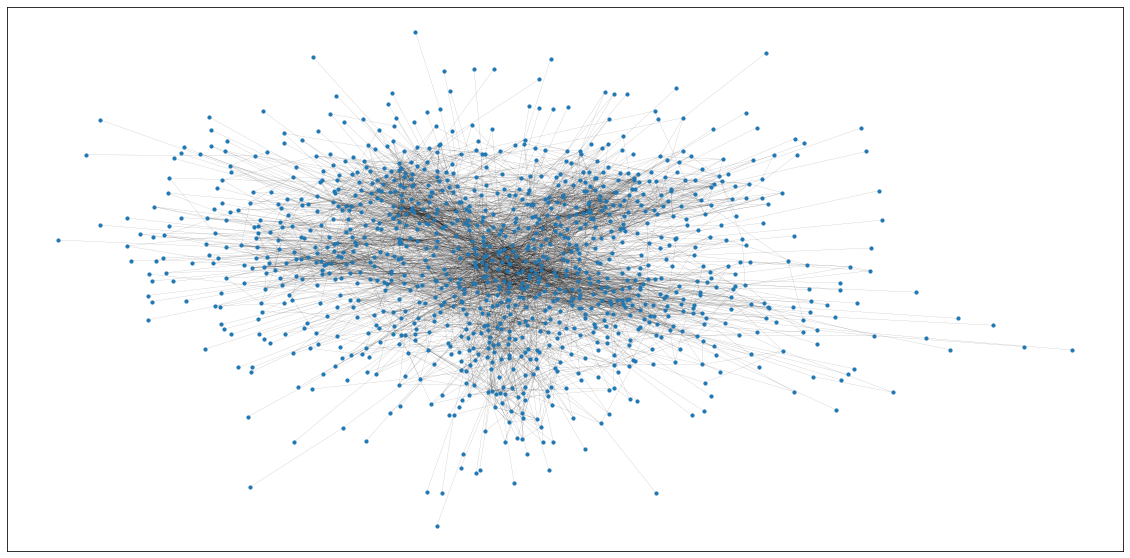

In [54]:
fig, ax = plt.subplots(figsize=(20, 10))

pos = nx.spring_layout(EmailNet)

nx.draw_networkx_nodes(EmailNet, pos, nodelist = EmailNet.nodes, node_size = 10)
nx.draw_networkx_edges(EmailNet, pos, edgelist = EmailNet.edges, width = 0.1, style= '--' )

II. [5 pts] Consider that when a student sends an email, a communication channel is created. If we consider that the information can be exchanged both ways, is it possible to go from one student/professor to every other?

##### Answer:

For the answers, and the lack of description, it is considered that the nodes of the network are an email address and the edges represents which address have already communicated
before (are contacts).

One can check on networkx that the graph is made only by one connected component which means that there is a path from x node to a y node, therefore based on that information, its feasible to say that from student or professor, there is way that information can be exchange between them (without knowing a new contact, which will be adding edges

##### III. [30 pts]Consider you want to share a Student Promotion Code in the Network and a student needs to be selected. We expect that the student who receives it will send to her friends. Based on the following restrictions which student will you choose:

(a)  The Student Promotion Code can be forwarded to multiple users at the same time but the distance is limited to one step, i.e. if the distances is more than one step, it is no longer valid. 

(b) The distance limitation is removed, so the every student will receive the code eventually. Which node should be choosen if we want to ensure that it reaches the students in the lowest average number of emails?

(c) In order to disrupt the distribution, which students must be targeted to stop replying if we choose information-bridge students? 

##### Answer:
a) In this case is simple, since the information can only travel once and we want to send the code to the most possible students, the solution is that the one who shares the code is the node with highest degree (72).

b) Here we want that when we choose a node on average, it takes the lower steps to reach from node x to any node, so we want the node which most serves as a bridge in the shortest paths between any nodes of the network. In this case using the betweenness centrality measure is the most appropriate way to find the node which is the common between all shortest paths of the network. Therefore, the student/teacher to be elected is the one with highest betweenness centrality. The inconvenience is that is a computational expensive operation.

c) For stopping the distribution of the codes, the easiest thing to do is to target the bridge nodes, and break the network into more connected components; but since we already choose these students as the starters, the best second strategy is to set a threshold for betweenness centrality and block those students that trespasses that threshold. It is important to note, the second strategy discussed will only slowdown the sharing process, but it won’t stop it, for achieving the latter, the first strategy is the one to follow.

**NOTE** An interesting use case can be found in Chapter: Centrality, Power and Bottlenecks from Social Network Analysis for Startups. Maksim Tsvetovat & Alexander Kouznetsou (2011) Social Network Analysis for Startups.

## References
Problem C. Use Case: E-mail Network is based on an exersice on Applied Social Network Analysis in Python at Coursera.